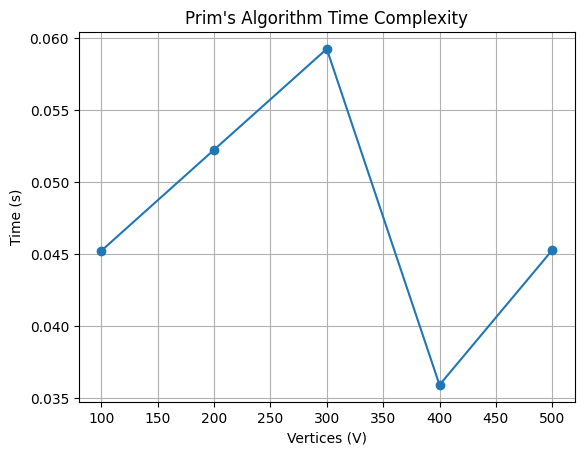

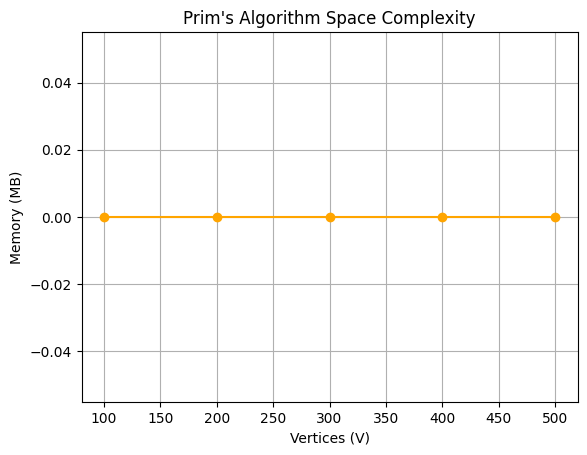

✅ Expected Time Complexity: O(E log V)
✅ Expected Space Complexity: O(V + E)


In [13]:
# === Problem 4: Network Cable Installation (Prim's MST) ===
!pip install memory_profiler psutil matplotlib --quiet

import heapq, time, random
from collections import defaultdict
from memory_profiler import memory_usage
import matplotlib.pyplot as plt

def prim_mst(graph):
    start_node = list(graph.keys())[0]
    visited = set([start_node])
    edges = [(w, start_node, v) for v, w in graph[start_node]]
    heapq.heapify(edges)
    total_cost = 0
    while edges:
        w, u, v = heapq.heappop(edges)
        if v not in visited:
            visited.add(v)
            total_cost += w
            for nxt, wt in graph[v]:
                if nxt not in visited:
                    heapq.heappush(edges, (wt, v, nxt))
    return total_cost

def generate_weighted_graph(V):
    graph = defaultdict(list)
    for i in range(V):
        for j in range(i + 1, V):
            if random.random() < 0.05:
                w = random.randint(1, 50)
                graph[i].append((j, w))
                graph[j].append((i, w))
    return graph

sizes, times, mems = [], [], []
for V in range(100, 600, 100):
    graph = generate_weighted_graph(V)
    start = time.time()
    mem_usage = memory_usage((prim_mst, (graph,)), interval=0.1)
    times.append(time.time() - start)
    mems.append(max(mem_usage) - min(mem_usage))
    sizes.append(V)

plt.plot(sizes, times, marker='o'); plt.title("Prim's Algorithm Time Complexity")
plt.xlabel("Vertices (V)"); plt.ylabel("Time (s)"); plt.grid(True); plt.show()

plt.plot(sizes, mems, marker='o', color='orange'); plt.title("Prim's Algorithm Space Complexity")
plt.xlabel("Vertices (V)"); plt.ylabel("Memory (MB)"); plt.grid(True); plt.show()

print("✅ Expected Time Complexity: O(E log V)")
print("✅ Expected Space Complexity: O(V + E)")
